In [1]:
import json
import numpy as np
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt

In [7]:
# 载入ts token并初始化
with open("token.json") as f:
    tokens = json.load(f)
ts_token = tokens.get("ts_token")
ts.set_token(ts_token)

In [9]:
# 从tushare-pro获取四组股票数据（需要token）
start = "2009-01-01"
end = "2019-01-01"
symbols = ["000001.SZ", "000002.SZ", "000651.SZ", "600519.SH"]
df_dict = dict()
for symbol in symbols:
    df = ts.pro_bar(symbol, start_date=start, end_date=end, adj="qfq")
    df.set_index("trade_date", inplace=True)
    df_dict[symbol] = df
    
price = pd.DataFrame({symbol: df["close"] for symbol, df in df_dict.items()})
price.fillna(method="ffill", inplace=True)
price

,000001.SZ,000002.SZ,000651.SZ,600519.SH
20090105,3.2273,5.1793,2.9540,68.6166
20090106,3.4234,5.3339,2.8686,68.8255
20090107,3.3204,5.3030,2.8339,67.6100
20090108,3.1907,5.3339,2.8165,68.7116
20090109,3.2738,5.3261,2.8781,67.9265
20090112,3.2771,5.2643,2.8892,67.0528
20090113,3.1475,5.0788,2.8860,64.4887
20090114,3.3901,5.3261,2.8924,64.5774
20090115,3.4234,5.2952,2.8924,63.2922
20090116,3.5297,5.3493,2.9556,64.2671


In [10]:
# 从tushare-pro获取指数数据（需要token）
start = "2006-01-01"
end = "2019-01-01"
symbols = ["000001.SH", "399001.SZ", "000300.SH", "000016.SH"]
df_dict = dict()
for symbol in symbols:
    df = ts.pro_bar(symbol, start_date=start, end_date=end, adj="qfq", asset='I')
    df.set_index("trade_date", inplace=True)
    df_dict[symbol] = df
    
index = pd.DataFrame({symbol: df["close"] for symbol, df in df_dict.items()})
index.fillna(method="ffill", inplace=True)
index

,000001.SH,399001.SZ,000300.SH,000016.SH
trade_date,,,,
20181228,2493.8962,7239.7891,3010.6536,2293.0985
20181227,2483.0864,7215.3379,2990.5057,2276.0571
20181226,2498.2939,7289.5457,3002.0327,2281.5579
20181225,2504.8190,7332.3467,3017.2815,2297.3326
20181224,2527.0071,7392.5604,3038.1981,2309.2327
20181221,2516.2506,7337.5975,3029.3951,2306.1451
20181220,2536.2675,7426.4407,3067.4169,2334.9217
20181219,2549.5634,7418.6926,3091.1255,2369.5483
20181218,2576.6495,7530.3247,3128.4265,2397.8676


In [ ]:
# 从tushare获取数据（旧版接口，无需token）
start = "2009-01-01"
end = "2019-01-01"
symbols = ["000001", "000002", "000651", "600519"]
df_dict = dict()
for symbol in symbols:
    df = ts.get_k_data(symbol, start=start, end=end)
    df.set_index("date", inplace=True)
    df_dict[symbol] = df
    
price = pd.DataFrame({symbol: df["close"] for symbol, df in df_dict.items()})
price.fillna(method="ffill", inplace=True)
price

In [14]:
price.iloc[0]

000001.SZ     3.2273
000002.SZ     5.1793
000651.SZ     2.9540
600519.SH    68.6166
Name: 20090105, dtype: float64

In [15]:
# 标准化股票数据
first = price.iloc[0]
normalize_price = price / first * 100
normalize_price.head()

,000001.SZ,000002.SZ,000651.SZ,600519.SH
20090105,100.000000,100.000000,100.000000,100.000000
20090106,106.076287,102.984959,97.109005,100.304445
20090107,102.884764,102.388354,95.934326,98.533008
20090108,98.865925,102.984959,95.345295,100.138450
20090109,101.440833,102.834360,97.430603,98.994267


In [21]:
# 反转ts-pro的指数数据
# index = index.loc[::-1]
index.head()

,000001.SH,399001.SZ,000300.SH,000016.SH
trade_date,,,,
20060104,1180.963,2948.798,941.428,812.597
20060105,1197.269,3037.968,959.134,827.836
20060106,1209.422,3053.314,970.032,836.895
20060109,1215.668,3064.847,975.253,838.292
20060110,1220.618,3079.919,978.154,838.563


In [22]:
# 标准化指数数据
index_first = index.iloc[0]
normal_index = index / index_first * 100
normal_index.head()

,000001.SH,399001.SZ,000300.SH,000016.SH
trade_date,,,,
20060104,100.000000,100.000000,100.000000,100.000000
20060105,101.380738,103.023944,101.880760,101.875345
20060106,102.409813,103.544359,103.038363,102.990166
20060109,102.938703,103.935468,103.592946,103.162084
20060110,103.357853,104.446591,103.901095,103.195434


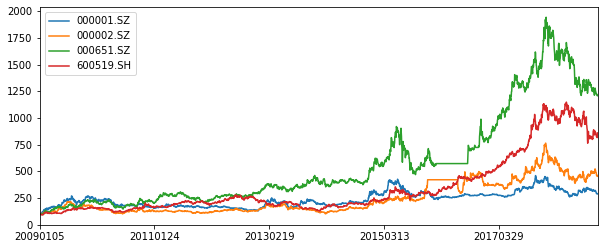

In [16]:
normalize_price.plot(figsize=(10, 4))

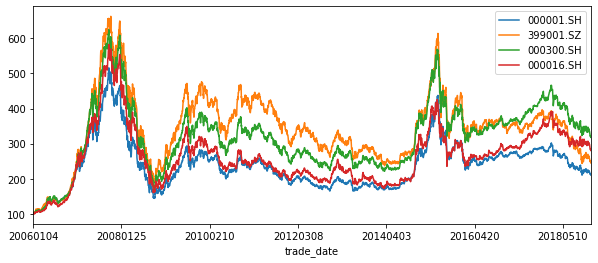

In [23]:
normal_index.plot(figsize=(10, 4))

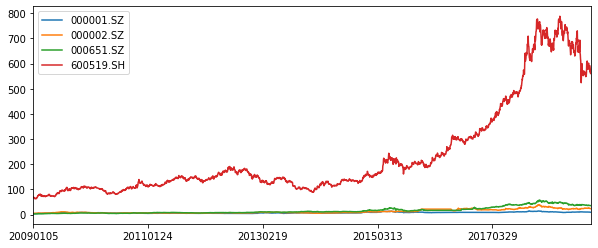

In [24]:
# 没有标准化的数据绘图, 无法比较
price.plot(figsize=(10, 4))

In [25]:
# 计算股票组合简单收益率
returns = price / price.shift(1) - 1
returns.head()

,000001.SZ,000002.SZ,000651.SZ,600519.SH
20090105,NaN,NaN,NaN,NaN
20090106,0.060763,0.029850,-0.028910,0.003044
20090107,-0.030087,-0.005793,-0.012096,-0.017661
20090108,-0.039062,0.005827,-0.006140,0.016293
20090109,0.026044,-0.001462,0.021871,-0.011426


In [26]:
# 计算指数简单收益率
idx_returns = index / index.shift(1) - 1
idx_returns.head()

,000001.SH,399001.SZ,000300.SH,000016.SH
trade_date,,,,
20060104,NaN,NaN,NaN,NaN
20060105,0.013807,0.030239,0.018808,0.018753
20060106,0.010151,0.005051,0.011362,0.010943
20060109,0.005164,0.003777,0.005382,0.001669
20060110,0.004072,0.004918,0.002975,0.000323


In [34]:
# 计算组合平均收益率
annual_returns = returns.mean() * 250
annual_returns

000001    0.170181
000002    0.229753
000651    0.324730
600519    0.269651
dtype: float64

In [27]:
# 计算指数平均收益率
idx_annual_returns = idx_returns.mean() * 250
idx_annual_returns

000001.SH    0.093928
399001.SZ    0.116447
000300.SH    0.131686
000016.SH    0.122594
dtype: float64

In [33]:
# 赋予股票在组合的权重
weights = np.array([[0.25, 0.25, 0.25, 0.25], [0.1, 0.1, 0.5, 0.3]])

In [35]:
# 用向量的方式计算组合的加权平均收益率
np.dot(weights, annual_returns)

array([0.24857887, 0.28325381])